In [62]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os

plt.rcParams['figure.dpi'] = 50

In [63]:
os.getcwd()

'/Users/divya/Documents/Semester-6/High Performance Computing /Temp'

### Cluster

/Users/divya/Documents/Semester-6/High Performance Computing /Temp


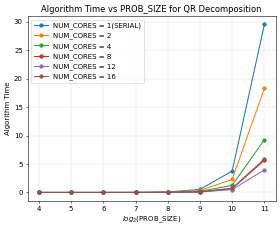

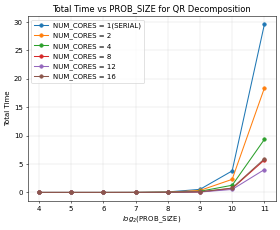

2
[9.79630600e-03 9.37468000e-03 9.16751400e-03 1.52016640e-02
 9.22067560e-02 5.44264567e-01 3.79434578e+00 2.95603353e+01]
[2.28726000e-04 4.22565000e-04 1.31057000e-03 7.44217000e-03
 5.08868580e-02 3.53618157e-01 2.30709010e+00 1.83569338e+01]
4
[9.79630600e-03 9.37468000e-03 9.16751400e-03 1.52016640e-02
 9.22067560e-02 5.44264567e-01 3.79434578e+00 2.95603353e+01]
[2.85539000e-04 3.70031000e-04 1.54030900e-03 6.22088800e-03
 3.92870870e-02 2.06002588e-01 1.26896052e+00 9.32617098e+00]
8
[9.79630600e-03 9.37468000e-03 9.16751400e-03 1.52016640e-02
 9.22067560e-02 5.44264567e-01 3.79434578e+00 2.95603353e+01]
[2.73359000e-04 4.20967000e-04 9.40706000e-04 2.95135600e-03
 1.43960320e-02 9.49327780e-02 6.97220191e-01 5.70860407e+00]
12
[9.79630600e-03 9.37468000e-03 9.16751400e-03 1.52016640e-02
 9.22067560e-02 5.44264567e-01 3.79434578e+00 2.95603353e+01]
[3.62994000e-04 4.98146000e-04 9.21623000e-04 3.29877700e-03
 1.18773540e-02 7.58274120e-02 5.30775566e-01 4.02424271e+00]
16
[9.7

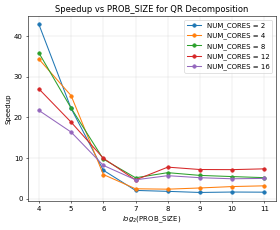

/Users/divya/Library/Python/3.9/lib/python/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

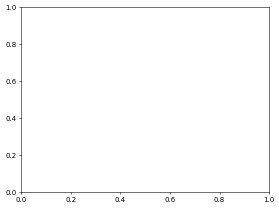

In [64]:
import os 
pwd = os.getcwd()
print(pwd)

path_Q1 = pwd + '/Cluster/data.csv'


dataQ1 = pd.read_csv(path_Q1)

num_cores = [0, 2,4,8,12,16]

dataQ1 = dataQ1[dataQ1['PROB_SIZE'] <= 2**28]

# Value of all entries in df['PROB_NAME'] in Q1 --> 'PI_TRAPEZOIDAL', Q2 --> 'SUM_VECTORS', Q3 --> 'QUICK_SORT'
dataQ1['PROB_NAME'] = 'QR_DECOMPOSITION'

# Plot df['ALG_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(1)
for i in num_cores:
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['ALG_TIME'],'-o', label = label,markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Algorithm Time')
plt.title('Algorithm Time vs PROB_SIZE for QR Decomposition')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1alg_cluster.png')
plt.show()

    

# Plot df['TOTAL_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(4)
for i in num_cores:
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],'-o', label = label,markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Total Time')
plt.title('Total Time vs PROB_SIZE for QR Decomposition')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1tot_cluster.png')
plt.show()



# Plot speedup for all number of cores 2,4,8,12,16 [problem_size vs Speedup]
#Q1
plt.figure(2)
speeup = []
df0 = dataQ1[dataQ1['NUMBER_CORES'] == 0]
# num_cores[0] = 1

for i in num_cores:
    if i == 0:
        continue
    print(i)
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    val0 = df0['TOTAL_TIME'].values
    val = df['TOTAL_TIME'].values
    print(val0)
    print(val)
    speedup = val0/val
    plt.plot(np.log2(df['PROB_SIZE']), speedup,'-o', label = 'NUM_CORES = ' + str(i),markersize=5)
    speeup.append(speedup)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Speedup')
plt.title('Speedup vs PROB_SIZE for QR Decomposition')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_cluster.png')
plt.show()
    
    

    
    
# Plot efficiency for all number of cores 2,4,8,12,16 [Processors vs Efficiency]
efficiency = []
for i in range(len(speeup)):
    if num_cores[i] == 0:
        efficiency.append(1)
    else:
        efficiency.append(speeup[i]/num_cores[i])

plt.figure(3)
plt.plot(num_cores, efficiency,'-o', label = 'QR_DECOMPOSITION',markersize=5)
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Processors for QR Decomposition')
plt.legend()
plt.xticks(num_cores)
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1eff_cluster.png')
plt.ylim(0,1.1)
plt.show()

print(speeup)
print(efficiency)

In [ ]:
import os
pwd = os.getcwd()
print(pwd)

path_Q1 = pwd + '/Lab PC/data.csv'


dataQ1_PC = pd.read_csv(path_Q1)


/Users/divya/Documents/Semester-6/High Performance Computing /Temp


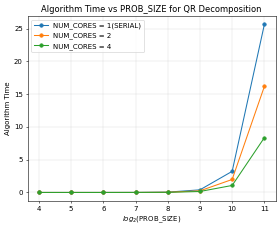

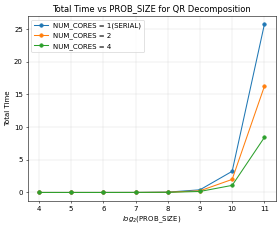

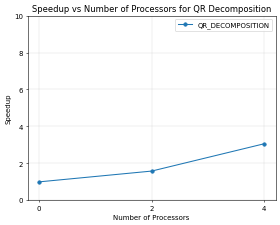

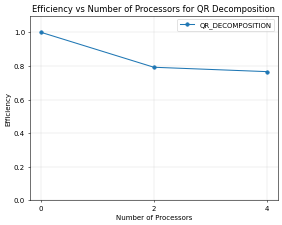

2
[9.79630600e-03 9.37468000e-03 9.16751400e-03 1.52016640e-02
 9.22067560e-02 5.44264567e-01 3.79434578e+00 2.95603353e+01]
[2.28726000e-04 4.22565000e-04 1.31057000e-03 7.44217000e-03
 5.08868580e-02 3.53618157e-01 2.30709010e+00 1.83569338e+01]
4
[9.79630600e-03 9.37468000e-03 9.16751400e-03 1.52016640e-02
 9.22067560e-02 5.44264567e-01 3.79434578e+00 2.95603353e+01]
[2.85539000e-04 3.70031000e-04 1.54030900e-03 6.22088800e-03
 3.92870870e-02 2.06002588e-01 1.26896052e+00 9.32617098e+00]


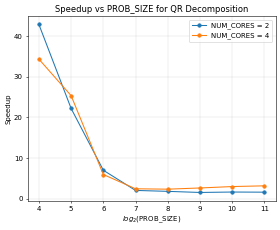

In [65]:


num_cores = [0, 2, 4]

dataQ1_PC = dataQ1_PC[dataQ1_PC['PROB_SIZE'] <= 2**28]

# Value of all entries in df['PROB_NAME'] in Q1 --> 'PI_TRAPEZOIDAL', Q2 --> 'SUM_VECTORS', Q3 --> 'QUICK_SORT'
dataQ1_PC['PROB_NAME'] = 'QR_DECOMPOSITION'

# Plot df['ALG_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(1)
for i in num_cores:
    df = dataQ1_PC[dataQ1_PC['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['ALG_TIME'],
             '-o', label=label, markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Algorithm Time')
plt.title('Algorithm Time vs PROB_SIZE for QR Decomposition')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1alg_pc.png')
plt.show()


# Plot df['TOTAL_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(4)
for i in num_cores:
    df = dataQ1_PC[dataQ1_PC['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],
             '-o', label=label, markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Total Time')
plt.title('Total Time vs PROB_SIZE for QR Decomposition')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1tot_pc.png')
plt.show()

# Plot speedup for all number of cores 2,4,8,12,16 [Processors vs Speedup]
#Q1
plt.figure(2)
speeup = []
df0 = dataQ1_PC[dataQ1_PC['NUMBER_CORES'] == 0]
# num_cores[0] = 1

for i in num_cores:
    if i == 1:
        i = 0
    df = dataQ1_PC[dataQ1_PC['NUMBER_CORES'] == i]
    series1 = df['ALG_TIME'].to_numpy()
    series2 = df0['ALG_TIME'].to_numpy()

    ser1 = series1[-1]
    ser2 = series2[-1]
    temspeedup = ser2/ser1
    speeup.append(temspeedup)

plt.plot(num_cores, speeup, '-o', label='QR_DECOMPOSITION', markersize=5)
plt.xlabel('Number of Processors')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Processors for QR Decomposition')
plt.legend()
plt.xticks(num_cores)
plt.ylim(0, 10)
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_pc.png')
plt.show()


# Plot efficiency for all number of cores 2,4,8,12,16 [Processors vs Efficiency]
efficiency = []
for i in range(len(speeup)):
    if num_cores[i] == 0:
        efficiency.append(1)
    else:
        efficiency.append(speeup[i]/num_cores[i])

plt.figure(3)
plt.plot(num_cores, efficiency, '-o', label='QR_DECOMPOSITION', markersize=5)
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Processors for QR Decomposition')
plt.legend()
plt.xticks(num_cores)
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1eff_pc.png')
plt.ylim(0, 1.1)
plt.show()


# Plot speedup for all number of cores 2,4,8,12,16 [problem_size vs Speedup]
#Q1
plt.figure(2)
speeup = []
#
# retain problem size greater than 2**8 only 
# dataQ1 = dataQ1[dataQ1['PROB_SIZE'] >= 2**8]
df0 = dataQ1[dataQ1['NUMBER_CORES'] == 0]
# num_cores[0] = 1

for i in num_cores:
    if i == 0:
        continue
    print(i)
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    val0 = df0['TOTAL_TIME'].values
    val = df['TOTAL_TIME'].values
    print(val0)
    print(val)
    speedup = val0/val
    plt.plot(np.log2(df['PROB_SIZE']), speedup, '-o',
             label='NUM_CORES = ' + str(i), markersize=5)
    speeup.append(speedup)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Speedup')
plt.title('Speedup vs PROB_SIZE for QR Decomposition')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_lab.png')
plt.show()


In [ ]:
# Merge dataQ1 and dataQ1_PC
dataQ1 = pd.concat([dataQ1, dataQ1_PC], ignore_index=True)

dataQ1.head(100)

dataQ1.to_csv('11_L6_Q1.csv')
